In [17]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
%matplotlib inline

statevec_simulator=q.Aer.get_backend("statevector_simulator")
qasm_sim=q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job=q.execute(circuit, backend=statevec_simulator)
    result=job.result()
    statevec=result.get_statevector()
    
    n_qubits=circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job=q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts=qasm_job.get_counts()
    
    return statevec , counts

In [18]:
circuit=q.QuantumCircuit(2,2)

circuit.cx(0,1)
circuit.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
c: 2/═════

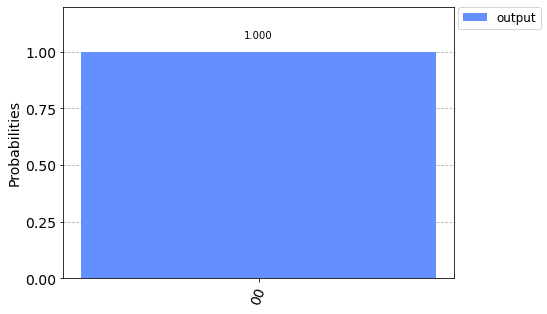

In [19]:
#초기 큐빗 상태 0,0 (초기는 CNOT 게이트에 들어가기 이전을 말합니다.)
circuit=q.QuantumCircuit(2,2)
#circuit.x(0)
circuit.cx(0,1)
circuit.draw()

statevec, counts = do_job(circuit)
plot_histogram([counts], legend=['output'])

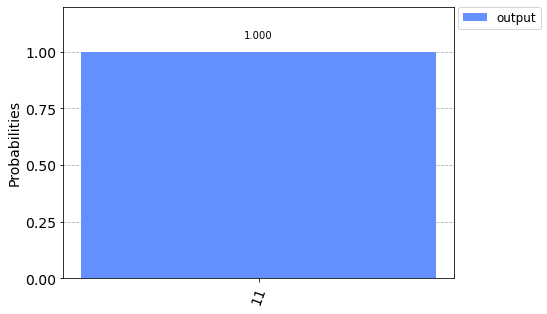

In [20]:
#초기 큐빗 상태 1,0
circuit=q.QuantumCircuit(2,2)
circuit.x(0)
circuit.cx(0,1)
statevec, counts = do_job(circuit)
plot_histogram([counts], legend=['output'])

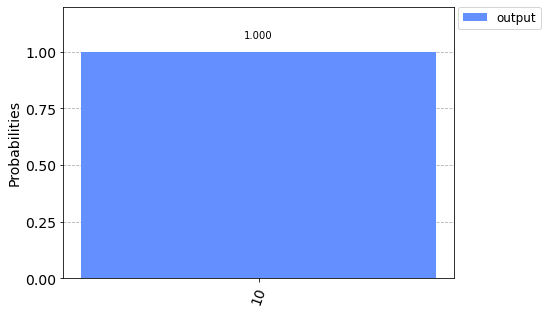

In [21]:
#초기 큐빗 상태 0,1
circuit=q.QuantumCircuit(2,2)
circuit.x(1)
circuit.cx(0,1)
circuit.draw()

statevec, counts = do_job(circuit)
plot_histogram([counts], legend=['output'])

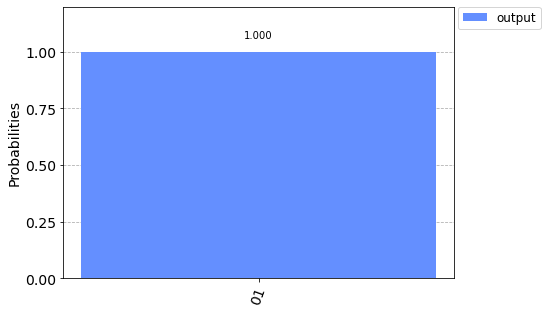

In [22]:
#초기 큐빗 상태 1,1
circuit=q.QuantumCircuit(2,2)
circuit.x(0)
circuit.x(1)
circuit.cx(0,1)
circuit.draw()

statevec, counts = do_job(circuit)
plot_histogram([counts], legend=['output'])